# Clasificación

En esta clase vamos a aprender que es _clasificar_ en el área de _Machine Learning_ y las diferencias de esta tarea respecto a otros posibles escenarios. Además, vamos a aprender cómo medir el desempeño de un modelo clasificador. Los contenidos de esta clase son:

- Posibles escenarios en el área de _Machine Learning_
- Clasificación binaria
- Medidas de desempeño
- Clasificación multiclase

Además, en este notebook encontrarás dos contenidos bonus:

- Curva _Precision vs Recall_.
- Curva ROC.

## Escenarios en el área de _Machine Learning_

Hasta ahora hemos tenido una noción de cómo funcionan los modelos supervisados. Tenemos datos que corresponden a un determinado dominio y estos datos tienen una cantidad determinada de _features_. Podemos definir una _feature_ como una medida de una propiedad para una instancia. En general las _features_ son números en el dominio de los reales. 

Para explicar mejor este concepto vamos a analizar un ejemplo clásico: un clasificador de números escritos a mano. Si lo vemos como imagen, los datos son los siguientes:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png" style="width: 400px;"/>

Tenemos un conjunto de varios números escritos a mano, cada uno de $28\times28$ pixeles. Si nos paramos en un número en particular, por ejemplo un 7, lo que tenemos es lo siguiente:

<img src="https://4.bp.blogspot.com/-9XZK9Dvd78E/V4i0e6UGoqI/AAAAAAAAE2E/-nxPCUIQ3wUGcIR-YOlSWTsC00UpfcDAACLcB/s1600/MNIST_image_7.png" style="width: 200px;"/>

Si pensamos en términos de _features_ o columnas de un _dataset_, cada pixel es una columna con un valor asociado que representa un número en la escala de grises (0 es blanco, 1 es negro, los valores entre ellos son grises). 

Vamos a decir que cada uno de los números del dataset es una observación, y como en general no nos gusta trabajar con objetos de dos dimensiones, vamos a "estirar" cada uno de los números a una lista de 784 elementos (recordemos que $28\times28=784$). Entonces, si vamos a entrenar con un dataset de 100 números, decimos que hay 100 observaciones, cada una con 784 features. Podemos pensar entonces en nuestro _dataset_ como una matrix $X$ de 100 filas y 784 columnas, donde las columnas son las features y las filas son las observaciones.

Recordemos que cada observación viene etiquetada con su respuesta, en una lista $y$ de 100 elementos. Por ejemplo:

- Si estamos clasificando una imagen como "es un 7" o "no es un 7", tenemos una lista de 100 elementos, que en la posición $i$ tiene el valor `True` si la $i$-ésima observación es un 7 y un `False` en caso contrario.
- Si queremos clasificar una imagen como uno de los posibles 9 dígitos, entonces en la posición $i$ tenemos el número que representa dicha observación. Podemos pensar esto como 10 posibles etiquetas.

Ahora bien, sabemos que existen otras tareas, como por ejemplo hacer una regresión. Esto es, predecir un valor numérico en vez de una clase. Ahora vamos a definir cada una de estas tareas en el área de _Machine Learning_.

### Posibles escenarios

Primero vamos a introducir un poco de notación. Consideremos que queremos aprender un dataset que contiene $n$ _features_. Decimos que a cada _feature_ le corresponde un dominio $\mathcal{F}_i$. Entonces, todo posible _input_ de nuestro modelo pertenecerá al conjunto $\mathcal{X} = \mathcal{F}_1 \times \dots \times \mathcal{F}_n$ conocido como _Input Space_ (espacio de _input_). Así, podemos afirmar que todas nuestras observaciones pertenecen a $\mathcal{X}$, y las instancias desconocidas que vamos a querer predecir, también. **Ojo**, es importante notar que cada fila de algún supuesto dataset $X$ pertenece a $\mathcal{X}$.

En el ejemplo anterior, todas las features tenían un dominio $\mathcal{F}_i$ que correspondía al conjunto de los reales en el intervalo $[0,1]$, y nuestro _Input Space_ serían todas las listas de largo 784 en donde en cada posición había un número real entre 0 y 1. Nosotros además sabemos que nuestros _inputs_ los podemos representar como imágenes.

Ahora bien, nuestro espacio de _output_ (_Output Space_) corresponde a las posibles respuestas que podemos obtener con nuestro modelo. Por ejemplo en clasificación, si en nuestro dataset tenemos la lista $y$ de etiquetas, llamaremos $\mathcal{C}$ al conjunto de todas las etiquetas. Así, sabemos que la respuesta para una instancia desconocida para el modelo, es alguna de las etiquetas en $\mathcal{C}$.

Ahora, como esta notación puede ser un poco confusa, recapitulemos los conceptos:

- Tenemos un dataset que es una matriz $X$. Cada fila es una observación y cada columna es una _feature_.
- Tenemos la etiqueta para cada observación en una lista $y$. El número de filas de $X$ es igual al largo de $y$.
- El conjunto de las posibles clases se llama $\mathcal{C}$. En clasificación este es el _Ouput Space_, pero veremos que para otras tareas no lo es.
- Cada instancia de nuestro problema (sea una observación o una instancia desconocida) viene de un _Input Space_ llamado $\mathcal{X}$.

Como ya tenemos la notación, ahora vamos por los posibles escenarios a los que nos enfrentaremos.

La siguiente tabla resume los posibles escenarios (o tipos de problemas) más típicos del área.

| Tarea | _Output Space_ | Problema de aprendizaje |
|---|---|---|
| Clasificación | Una clase perteneciente a $\mathcal{C}$ | Encontrar una función $\hat{c}: \mathcal{X} \rightarrow \mathcal{C}$ que para una instancia desconocida, nos prediga su clase. |
| Estimar probabilidad | Un vector $[0,1]^{\mathcal{C}}$ en que la suma de sus elementos es 1 | Aprender una función que para una instancia desconocida, nos entregue una probabilidad asociada a cada clase |
| Regresión | $\mathbb{R}$ | Aprender una aproximación $f: \mathcal{X} \rightarrow \mathbb{R}$ que para una instancia desconocida, nos prediga un número asociado.

Quizás esta notación es un poco compleja, pero vamos a aterrizarla con un ejemplo. Considera el ejemplo de los dígitos escritos a mano. 

- Si hacemos un programa que reciba una imagen y nos dice que número es, estamos en el escenario de **clasificación**. - Si hacemos un programa que reciba una imagen y nos da la probabilidad de que sea 0, 1, 2, ..., 9, estamos en el escenario de **Estimar probabilidad**. Ojo que la suma de todas las probabilidades debe ser 1.

En cuanto a la regresión, corresponde al escenario visto anteriormente: por ejemplo, predecir el valor de una vivienda en base a los metros cuadrados de la misma. Ojo que para la Regresión, la respuesta proviene de los números reales $\mathbb{R}$ y no un conjunto de clases $\mathcal{C}$.

## Clasificación binaria

En el problema de clasificación binaria, nuestro espacio de output son dos clases, generalmente conocidas como positiva ($\oplus$) y negativa ($\ominus$). Entonces, vamos a retormar el ejemplo de la clase introductoria. Vamos a hacer un programa que clasifique una imagen del _dataset_ MNIST en "es un 7" (clase $\oplus$) o en "no es un 7" (clase $\ominus$).

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

En la celda anterior cargamos los datos y las respuestas:

In [3]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Ahora vamos a importar un modelo para hacer clasificación. No entraremos en detalles de como funciona, pero tienes que saber que sigue el mismo patrón de lo que hicimos la clase pasada. Vamos a pasar los datos y las respuestas a la función `fit` para que el modelo aprenda y esté listo para predecir.

In [5]:
import numpy as np
from sklearn.linear_model import SGDClassifier

y = y.astype(np.uint8)

# Por defecto en el dataset MNIST los primeros 60000 registros son de entrenamiento
# Y lo que queda hacia adelante es de prueba
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Generamos arreglos que sean True en las posiciones donde hay un 7
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

# Creamos el objeto del modelo
sgd_clf = SGDClassifier()

# Entrenamos el objeto del modelo con nuestra data
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Aquí tenemos entrenado nuestro clasificador. Este está almacenado en la variable `sgd_clf`. Ahora bien, ¿qué tan bueno es nuestro clasificador? Primero mediremos el desempeño sobre el _dataset_ de prueba, para luego utilizar la técnica que aprendimos la clase pasada para medir el desempeño: cross-validation.

In [6]:
from sklearn.metrics import accuracy_score

y_pred_7 = sgd_clf.predict(X_test)
accuracy_score(y_test_7, y_pred_7)

0.9791

Recordemos que en la celda anterior estamos prediciendo con nuestro clasificador entrenado sobre el _dataset_ de prueba. Luego, estamos utilizando la función `accuracy_score`, a la que le pasamos las respuestas reales y nuestras predicciones. Luego nos dice el porcentaje de respuestas correctas en nuestras predicciones. Ahora vamos con _cross-validation_.

In [39]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_7, cv=3, scoring='accuracy').mean()

0.9779666666666667

Aquí estamos calculando cross-validation dividiendo el dataset en 3 partes. Cuando hicimos una regresión anteriormente, el valor era en base del error medio cuadrado. Ahora que estamos haciendo clasificación, esto no hace mucho sentido, por lo que lo que calculamos es el porcentaje de respuestas correctas. El valor es muy alto, ¡deberíamos estar felices!, pero ¿esta es realmente una buena medida para entender nuestro modelo? Vamos a discutir esto en la siguiente sección.

## Medidas de desempeño

Vamos a hacer un ejercicio bastante sencillo. Vamos a hacer un clasificador que siempre nos diga que **no estamos viendo un 7** y vamos a medir su desempeño.

In [8]:
from sklearn.base import BaseEstimator

# Aquí estamos creando nuestro propio predictor
class Never7Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

En el ejemplo anterior estamos definiendo nuestro propio modelo, que contesta `False` siempre. Vemos además que es muy fácil hacer nuestros propios clasificadores. 

Ahora bien, antes de continuar, ¿puedes adivinar el desempeño que va a tener este clasificador?

In [9]:
n7_clf = Never7Classifier()
n7_clf.fit(X_train, y_train_7)

y_pred_n7 = n7_clf.predict(X_test)

accuracy_score(y_test_7, y_pred_n7)

0.8972

Así es, cerca de 90% para un muy mal clasificador. Esto no nos sorprende, porque cerca del 10% de los elementos del dataset son un 7. Esto nos muestra por qué _Accuracy_ no es una buena medida de desempeño, especialmente cuando algunas clases aparecen poco: un clasificador que nunca prediga esas clases se debería comportar siempre relativamente bien. Por lo mismo, vamos a medir el desempeño de una mucho mejor forma: la matriz de confusión (_Confusion Matrix_).

### Matriz de confusión

En una matriz de confusión tenemos una fila que representa la clase que estamos analizando y una columna para cada clase predicha para las instancias de la fila. Veamos cómo se ve en nuestro ejemplo.

Vamos ahora por la matriz de confusión.

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_7, y_pred_7)

array([[8926,   46],
       [ 163,  865]])

¿Cómo se le esta matriz? La podemos leer como indica la siguiente tabla:

| | **Predije que no era 7** (Predije Clase Negativa)| **Predije que era un 7** (Predije Clase Positiva)|
|---|---|---|
| **No era un 7** (Clase Negativa) | _True Negative_ | _False Positive_ |
| **Era un 7** (Clase Positiva) | _False Negative_ | _True Positive_ | 

Recordemos que la clase 0 significa "no es 7", y la clase 1 significa "es un 7". Así que la fila 0 nos dice que 8816 instancias que tenían la clase 0, fueron clasificadas como clase 0, mientras que 156 instancias de clase 0 fueron clasificadas como clase 1. Mientras tanto, la fila 1 nos dice que 71 instancias que eran de la clase 1 fueron clasificadas como clase 0 y 957 instancias de clase 1 fueron clasificadas correctamente. Vamos ahora cómo se comporta nuestro clasificador que siempre responde **No es un 7**.

In [11]:
confusion_matrix(y_test_7, y_pred_n7)

array([[8972,    0],
       [1028,    0]])

Como es de esperar, acerto en todos las instancias que no son 7, y se equivocó en todas las que son 7. Así, un clasificador perfecto tiene números  solamente en la diagonal, y en todos los demás casilleros hay 0s. Gracias a la matriz de confusión, tenemos una medida objetiva de que este modelo es malo, a pesar de su buen _accuracy_.

### _Precision_ y _Recall_

Si bien la matriz de confusión nos entrega varios valores (si tenemos más clases son muchas más filas y columnas!) a veces queremos algo más concreto. Dos medidas bastante famosas son _Precision_ y _Recall_. Vamos a presentarlas a continuación.


$$
\text{precision} = \frac{TP}{TP + FP}
$$

$$
\text{recall} = \frac{TP}{TP + FN}
$$

En donde $TP$ son los verdaderos positivos (_True Possitive_), $FP$ son los falsos positivos (_False Possitives_) y $FN$ los falsos negativos (_False Negatives_).

Para entender mejor de que se trata esto, centrémonos en el ejemplo:

- Un modelo de alta precisión está seguro de sus respuestas. En nuestro ejemplo, cada vez que el modelo diga que una imagen es un 7, si su precisión es alta, es porque está muy seguro de esto. Es decir, cada vez que clasifica algo de clase positiva, hay una alta probabilidad de que esté en lo correcto.
- Un modelo de alto _recall_ tiende a capturar la mayoría de los elementos de la clase positiva. En nuestro ejemplo, un modelo de alto _recall_ tendería a encontrar la mayoría de las imágenes que representan al número 7.

¿Por qué necesitamos dos valores? La respuesta la podemos entender con el siguiente ejemplo: supón que tenemos un modelo que solamente clasifica un elemento de forma correcta, pero está muy seguro de lo que hace. Así, los falsos positivos serán 0 y la precisión será $1/1$, que equivale al 100%. Así podemos entender la precisión como **cuando digo que algo es de una clase, qué porcentaje de las veces estoy en lo correcto** y el _recall_ como **de los positivos que existen, cuantos estoy detectando**. Veamos esta medida en nuestro clasificador de 7s.

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test_7, y_pred_7)

0.9495060373216246

In [13]:
recall_score(y_test_7, y_pred_7)

0.8414396887159533

Al comparar estas metricas con nuestro predictor anterior, en donde todo era Falso

In [40]:
precision_score(y_test_7, y_pred_n7)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [41]:
recall_score(y_test_7, y_pred_n7)

0.0

Así, vemos que nuestro clasificador no está "realmente seguro" cuando dice que algo es un 7, mientras que sí detecta la mayoría de los 7. También existe otro puntaje en el que no vamos a hacer énfasis, pero es el $F_1$ _score_, que es la media armónica entre _Precision_ y _Recall_:

$$
F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

In [14]:
f1_score(y_test_7, y_pred_7)

0.8922124806601341

Que es una medida que beneficia a modelos con precisión y _recall_ similares. Pero a veces queremos modelos que beneficien la precisión o el _recall_. Pensemos en los siguientes casos:

- Queremos hacer un modelo que nos diga si ciertos medicamentos son seguros para la salud. Aquí nos interesa estar realmente seguros de si un medicamento es clasificado como seguro (positivo), a pesar de que podamos tener muchos falsos negativos. Aquí queremos altra precisión, a un costo de bajo _recall_.
- Queremos hacer un modelo que recomiende canciones a alguien. Quizás no nos importa equivocarnos a cambio de que todas las posibles canciones que le gustan a la persona sean recomendadas. Aquí tendremos varios falsos positivos, por lo que habrá una baja precisión, pero tendremos un alto _recall_, porque el objetivo era tener pocos falsos negativos.

## Clasificación multiclase

Supongamos que ahora no queremos saber si algo es o no es un 7, sino que queremos saber qué número es. Con lo que sabemos hasta ahora, ¿cómo lo podemos hacer?

Una opción es crear un clasificador de 0s, de 1s, ..., de 8s y de 9s. Luego para clasificar, nos quedamos con el número representado por el clasificador que como output entregue el mayor puntaje. Esta estrategia se llama _one-versus-the-rest_ (OvR).

La otra opción es entrenar un clasificador binario para cada par de dígitos. Esto sería, un comparador de 0s con 1s, de 1s con 2s, y así sucesivamente. Luego nos quedamos con el dígito que haya ganado la mayor cantidad de "duelos". Esta estrategia, si tenemos $N$ clases, implica entrenar $N \times (N - 1) / 2$. Esto para MNIST implica entrenar ¡45 clasificadores! aunque a su vez, cada clasificador se entrena con el subconjunto de imágenes que se enfrentan.

Igual es importante saber que hay modelos que son multiclase de forma nativa y la estrategia anterior es solo para los modelos que no la soportan nativamente. En general, preferimos OvR cuando cuando el modelo escala bien respecto al tamaño del conjunto de entrenamiento, mientras que el OvO se utiliza cuando el entrenamiento no funciona bien para muchos datos.

La librería `Scikit Learn` entiende cuando uno quiere hacer una clasificación multiclase y por debajo toma la mejor decisión. Vamos a ver un ejemplo con el _dataset_ MNIST. En este caso usaremos un modelo llamado `Support Vector Machine` para clasificar. Si bien no explicaremos cómo funciona en detalle, basta con que sepas que la interfaz `fit` y `predict` no cambia.

In [15]:
from sklearn.svm import SVC

# Ojo, esto puede demorarse un poco

# Creamos el objeto del modelo
svm_clf = SVC()

# Entrenamos el modelo con nuestra data
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Vamos a tomar el primer dígito el _dataset_ de prueba.

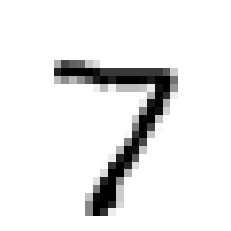

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [17]:
svm_clf.predict([some_digit])

array([7], dtype=uint8)

Veamos las clases que detectó el modelo

In [18]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Ojo**: si queremos entrenar un `SGDClassifier`, podemos hacerlo de la misma forma.

In [19]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([7], dtype=uint8)

Ahora vamos a evaluar nuestro modelo con _cross-validation_. Es un buen ejercicio que te detengas y pienses que significa hacer _cross-validation_ en este caso.

In [20]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='accuracy')

array([0.8653467 , 0.86229803, 0.88959842])

Estos son muy buenos puntajes, porque en este caso un clasificador _random_ tendría cerca del 10% de _accuracy_. Sin embargo, es una buena idea revisar la matriz de confusión para este escenario.

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X, y, cv=3)
conf_mx = confusion_matrix(y, y_train_pred)
conf_mx

array([[6582,    1,   42,   67,   14,   68,   47,    3,   59,   20],
       [   1, 7635,   47,   49,    8,   42,    7,   10,   67,   11],
       [  53,   89, 6152,  269,   60,   42,   77,   69,  144,   35],
       [  28,   22,  201, 6436,   10,  207,   21,   39,  101,   76],
       [  17,   34,   68,   27, 5983,  109,   61,   25,  175,  325],
       [  83,   43,   52,  448,   62, 5160,  102,   33,  218,  112],
       [  68,   24,   82,   17,   29,  151, 6395,    0,  107,    3],
       [  28,   42,  143,  139,   71,   42,    8, 6401,   67,  352],
       [  69,  175,  148,  513,   46,  461,   57,   48, 5050,  258],
       [  36,   42,   39,  208,  169,  170,    1,  208,  154, 5931]])

Ahora bien, dado que tenemos muchos números, lo mejor es ver esto como una imagen. En esta imagen en escala de grises veremos para cada fila el número de instancias que son del número representado por esa clasificadas en cada columna. Mientras más instancias caen en un determinado casillero, más blanco el casillero. El casillero con el menor valor se lleva el color negro, y el de mayor valor el color blanco.

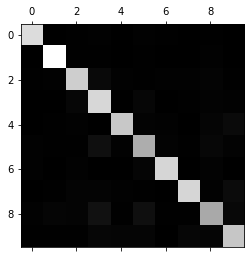

In [22]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Ahora nos queremos concentrar en los errores, así que vamos a hacer lo siguiente:

- Primero, vamos a setear en 0 la diagonal para que no nos entregue ruido.
- Segundo, vamos a normalizar cada fila. Esto es sumar los valores de cada fila, y dividir todos los elementos de esa fila por el valor. Esto se hace porque una clase muy grande se puede ver mal en comparación a otras, pero si lo miramos como _ratio_, puede no ser así.

In [23]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

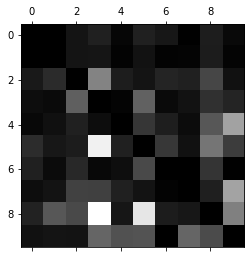

In [24]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Aquí podemos ver que la principal fuente de errores es el número 8. El hecho de que esta columna esté más clara es que muchas instancias de otros números caen clasificadas erróneamentes ahí, principalmente instancias del número 5.

## Bonus: más sobre medidas de desempeño

### _Trade-off_ entre precisión y _recall_

Para esta parte volvamos al ejemplo original: el clasificador de 7s. Primero, vamos a tomar de nuevo la primera imagen de nuestro dataset, porque vamos a hacer unas pruebas con ella.

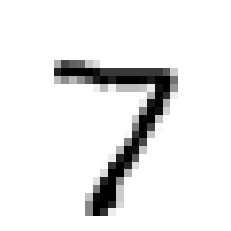

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [26]:
import numpy as np
from sklearn.linear_model import SGDClassifier

y_7 = (y == 7)

# Modelo que vamos a entrenar
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Tenemos una imagen que es un 7. Ahora vamos a entender cómo clasifica por debajo nuestro modelo `sgd_clf`. En realidad, lo que hacemos es tener una función de decisión que nos da un puntaje, y si el puntaje es mayor que 0, entonces se clasifica como positiva, y negativa en caso contrario.

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([7846.26721143])

Ahora vamos a ver cómo varía nuestra decisión a medida que cambiamos el treeshold, originalmente en 0.

In [28]:
import ipywidgets as widgets
from IPython.display import display

# Para hacerlo más elegante, lo haremos con un widget
threshold = widgets.IntSlider(min=0, max=10000)
display(threshold)

IntSlider(value=0, max=10000)

In [43]:
y_some_digit_pred = (y_scores > threshold.value)
y_some_digit_pred

array([False, False, False, ..., False, False, False])

Como vemos, al superar un dígito relativamente elevado, vamos a predecir que nuestra imagen no es un 7. Por ende, estamos reduciendo el _recall_ cuando aumentamos el threshold porque de los 7s existentes, capturamos menos de ellos. A cambio, el modelo "está más seguro de lo que dice", por ende se aumenta la precisión.

Ahora lo que haremos será generar una curva que nos muestra la precisión y el _recall_ a medida que variamos el threshold.

In [30]:
from sklearn.metrics import precision_recall_curve

# Ahora retornamos nuestra función de decisión que asigna el puntaje
y_scores = cross_val_predict(sgd_clf, X, y_7, cv=3, method='decision_function')

# Thresholds tiene un casillero menos que precisions y recalls
precisions, recalls, thresholds = precision_recall_curve(y_7, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc="center right", fontsize=16) # Not shown in the book

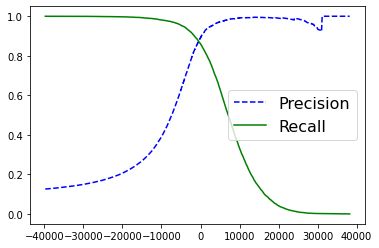

In [31]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Así podemos entender cómo cambia la evaluación a medida que cambia el threshold. Es un buen ejercicio entender cómo es esta curva para otros de los dígitos. ¿Se comportarán todos iguales?

Además, esta curva nos permite saber cuál es el valor del threshold para obtener determinada precisión o _recall_. Por ejemplo, si queremos una precisión del 90%, nos gustaría tener el mínimo valor del threshold para lograr esto. Esto lo podemos hacer con la función `np.argmax`, a la que le pasamos una lista con una condición y nos entrega el primer índice que cumple esa condición.

In [32]:
np.argmax(precisions >= 0.9)

50963

Así, en esta posición, se comienza a cumplir el criterio, ahora vamos a buscar al arreglo de thresholds el valor en esta posición.

In [33]:
thresholds[np.argmax(precisions >= 0.9)]

230.06605738648432

Aquí tenemos el threshold que buscábamos. Ahora para predecir con precisión >= 90% podemos hacer lo siguiente:

In [34]:
thresholds_90 = thresholds[np.argmax(precisions >= 0.9)]
y_pred_90 = y_scores >= thresholds_90

Veamos la precisión y el _recall_ en estos casos.

In [35]:
precision_score(y_7, y_pred_90)

0.9

In [36]:
recall_score(y_7, y_pred_90)

0.8527354997943233

Lo que acabamos de hacer es muy importante: podemos ajustar nuestros modelos según nuestras necesidades. Distintos problemas requieren poner atención a ciertas partes por sobre otras. Ahora vamos a medir una última medida de desempeño, que es la curva ROC.

### La curva ROC

La curva ROC (por sus siglas en inglés, _receiver operating characteristic_) es una herramientra utilizada para medir el desempeño de clasificadores binarios. Esta curva grafica la tasa de verdaderos positivos (que vendría a ser el _recall_) en función de la tasa de falsos positivos ($FPR$ de _False Positive rate_). Esto vendría a ser:

$$
FPR = \frac{FP}{TN + FP}
$$

Y recordemos que:

$$
\text{recall} = TPR = \frac{TP}{TP + FN}
$$

Donde $FP$ son los falsos positivos y $TN$ vendrían a ser los falsos negativos. Intuitivamente, si el _recall_ incrementa, el costo es tener más falsos positivos. Si lo pensamos de una nueva forma tenemos que:

- La tasa de verdaderos positivos es el porcentaje de las instancias realmente positivas en las que yo digo (correctamente) que son positivas.
- La tasa de falsos positivos es el porcentaje de las instancias realmente negativas en las que yo digo (incorrectamente) que son positivas.

Vamos ahora a graficar la curva.

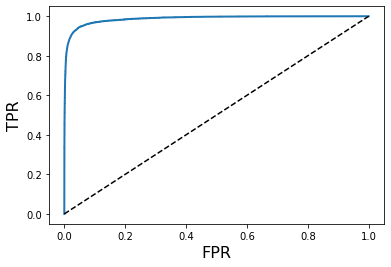

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_7, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR', fontsize=16)
    plt.ylabel('TPR', fontsize=16) 
    
plot_roc_curve(fpr, tpr)
plt.show()

Aquí por debajo lo que está variando es el treshold, entonces para cada treshold, vamos viendo los puntos $(FPR, TPR)$. Una buena forma de entender esto es que nos interesa tener un clasificador que para una baja tasa de falsos positivos, tenga una alta tasa de verdaderos positivos. Así, si el área bajo la curva es cercana a uno, tendremos un buen clasificador. Podemos calcular esto rápido con `scikit_learn`. **Observación**: un clasificador puramente aleatorio, debería tener un área bajo la curva de 0.5.

In [38]:
from sklearn.metrics import roc_auc_score

# AUC = Area under the curve
roc_auc_score(y_7, y_scores)

0.9869830993600834

Con esto, sabemos que es un buen clasificador.

## Palabras al cierre

En este _notebook_ aprendimos a utilizar y evaluar modelos de clasificación. Recuerda que para tener un mejor entendimiento, tienes que entender cómo funciona cada modelo y también entender cada una de las métricas. Es importante entender bien si el modelo está funcionando bien o mal, ya que muchas veces uno puede caer en la tentación de creer que algo funciona bien porque el _accuracy_ era alto. Sin embargo, debemos ir más allá para estar realmente seguros de que nuestro modelo se comporta como esperamos.